In [23]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
import json
import benepar
benepar.download('benepar_en2')
import spacy
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package benepar_en2 to
[nltk_data]     /Users/sisi/nltk_data...
[nltk_data]   Package benepar_en2 is already up-to-date!


In [24]:
# dataDir='..' 
dataType=['train2014','val2014']
# annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)
annFile_train='annotations/instances_{}.json'.format(dataType[0])
annFile_val='annotations/instances_{}.json'.format(dataType[1])
splitFile = 'dataset.json'
dataDir = 'data2014'

In [7]:
# initialize COCO api for instance annotations
coco_train=COCO(annFile_train)
coco_val=COCO(annFile_val)

loading annotations into memory...
Done (t=10.10s)
creating index...
index created!
loading annotations into memory...
Done (t=5.64s)
creating index...
index created!
loading annotations into memory...
Done (t=0.10s)
creating index...
index created!


In [8]:
# initialize COCO api for caption annotations
capFile_train = 'annotations/captions_{}.json'.format(dataType[0])
capFile_val = 'annotations/captions_{}.json'.format(dataType[1])

coco_caps_train = COCO(capFile_train)
coco_caps_val = COCO(capFile_val)

loading annotations into memory...
Done (t=0.63s)
creating index...
index created!
loading annotations into memory...
Done (t=0.34s)
creating index...
index created!


In [9]:
# get COCOids by split
# 82783 train, 5000 val, 5000 test
with open(splitFile) as jsf:
    data = json.load(jsf)
IMAGES = data['images']

In [11]:
# return the ids for
dataIds = {}
dataIds['train'] = []
dataIds['test'] = []
dataIds['val'] = []
for im in IMAGES:
    cocoid = im['cocoid']
    if im['split'] == 'train':
        dataIds['train'].append(cocoid)
    elif im['split'] == 'test':
        dataIds['test'].append(cocoid)
    elif im['split'] == 'val':
        dataIds['val'].append(cocoid)

size = [len(d) for d in dataIds.values()]
assert(sum(size) == 92783)

In [94]:
def write_data(splitType, coco_im, coco_cap, dataIds):
    capfile = dataDir + '/' + splitType + '_cap.txt'
    imfile = dataDir + '/' + splitType + '_name.txt'
    with open(capfile, 'w') as cap, open(imfile, 'w') as name:
        for dataId in dataIds[splitType]:
            img = coco_im.loadImgs(dataId)[0]
            annIds = coco_cap.getAnnIds(imgIds=img['id']);
            anns = coco_cap.loadAnns(annIds)
            caps = get_anns(anns)
            if caps is None or len(caps) < 1:
                continue
            else:
                filename = img['file_name']
                caps = caps.rstrip()
                cap.write(caps + '\n')
                name.write(filename + '\n')

In [97]:
write_data('train', coco_train, coco_caps_train, dataIds)

In [73]:
def get_anns(anns):
    for ann in anns:
        cap = ann['caption']
        cap = cap.replace('.', '')
        action = has_action(cap)
        if action:
            return cap
    return None

In [74]:
def has_action(ann):
#     print(ann)
    doc = nlp(ann)
    for token in doc:
        if token.dep_ == 'ROOT' and token.head.pos_ == 'VERB':
            return True
        elif token.dep_ == 'ROOT':
            return 'VERB' in [child.pos_ for child in token.children]
    return False

In [21]:
parser = benepar.Parser("benepar_en2")
tree = parser.parse("Short cuts make long delays.")
print(tree)



(S
  (NP (JJ Short) (NNS cuts))
  (VP (VBP make) (NP (JJ long) (NNS delays)))
  (. .))


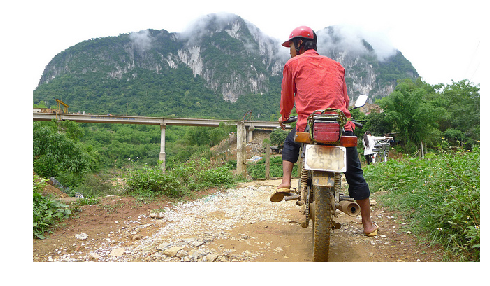

In [32]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

A man with a red helmet on a small moped on a dirt road. 
Man riding a motor bike on a dirt road on the countryside.
A man riding on the back of a motorcycle.
A dirt path with a young person on a motor bike rests to the foreground of a verdant area with a bridge and a background of cloud-wreathed mountains. 
A man in a red shirt and a red hat is on a motorcycle on a hill side.


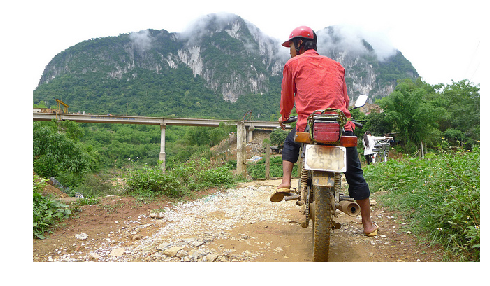

In [26]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()